In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier as GDBSklearn
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
import plotly.express as px
%matplotlib inline
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
%matplotlib inline
df = pd.read_csv("smoking.csv", nrows=10000)
df.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


#Предобработка данных

In [ ]:
df = df.drop_duplicates() #удаляем повторяющиеся записи
df = df.dropna() #Удаляем Nan, чтобы не было пустых строк
df = df.drop(['Urine protein', 'oral', 'tartar', 'ID', 'hearing(left)', 'hearing(right)', 'dental caries'], axis=1)
#заменим F  на 0, M - 1
df.loc[(df.gender == "F"), 'gender'] = 0
df.loc[(df.gender == "M"), 'gender'] = 1
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape
df.head(5)


<ipython-input-2-13730dd52874>:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-2-13730dd52874>:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-2-13730dd52874>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking
0,0,40,155,60,81.3,1.2,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,0
2,1,55,170,60,80.0,0.8,0.8,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,1
4,0,40,155,60,86.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,0
5,1,30,180,75,85.0,1.2,1.2,128.0,76.0,95.0,217.0,199.0,48.0,129.0,16.2,1.2,18.0,27.0,33.0,0
6,1,40,160,60,85.5,1.0,1.0,116.0,82.0,94.0,226.0,68.0,55.0,157.0,17.0,0.7,21.0,27.0,39.0,1


#диаграмма рассеяния

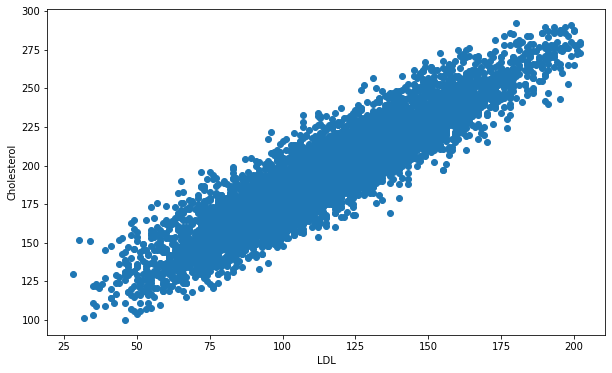

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['LDL'], df['Cholesterol'])
ax.set_xlabel('LDL')
ax.set_ylabel('Cholesterol')
plt.show()

#Ящик с усами

In [ ]:
sns.boxplot(x=df['age'])

NameError: name 'sns' is not defined

In [ ]:
sns.boxplot(x=df['height(cm)'])

In [ ]:
sns.boxplot(x=df['waist(cm)'])

In [ ]:
sns.boxplot(x=df['weight(kg)'])

In [ ]:
y=df['smoking']
X=df.drop(columns='smoking')

#k-means

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
k_means = KMeans(n_clusters = 2)
k_means.fit(X)
y_kmeans = k_means.predict(X)
#accuracy_score(y, y_kmeans)
#X, y_true = make_blobs(n_samples = 400, centers = 2, cluster_std = 0.60, random_state = 0)
# plt.scatter(X[:, 0], X[:, 1], c = y_kmeans)
# centers = k_means.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
# plt.show()

plt.figure(figsize=(12, 10))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y_kmeans,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("Spectral", 2),
)
plt.colorbar()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


InvalidIndexError: ignored

<Figure size 1200x1000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

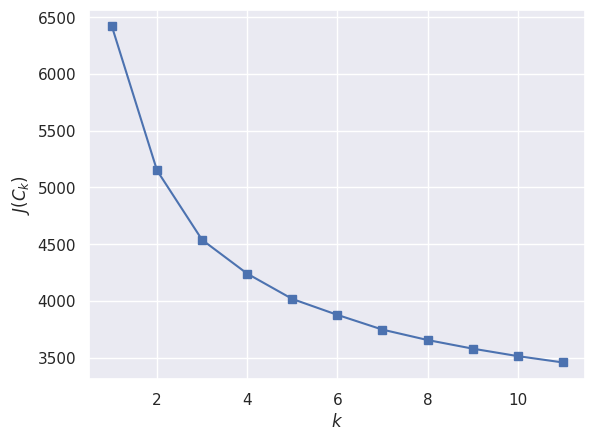

In [ ]:
inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 12), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");


#Иерархическая кластеризация

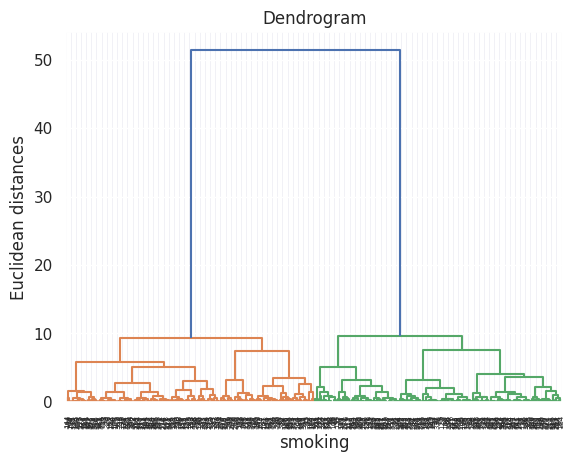

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


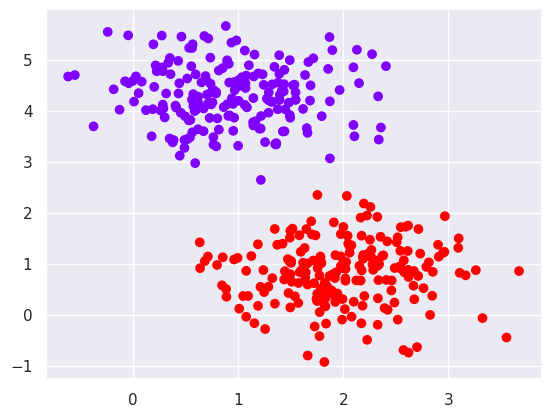

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('smoking')
plt.ylabel('Euclidean distances')
plt.show()

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)
X, y_true = make_blobs(n_samples = 400, centers = 2, cluster_std = 0.60, random_state = 0)

plt.scatter(X[::,0],X[::,1], c = cluster.labels_, cmap = 'rainbow')

#DBSCAN

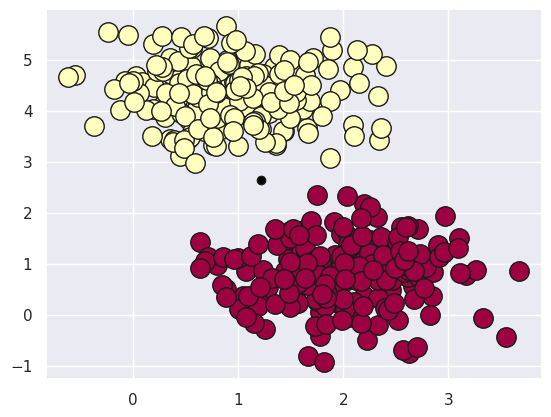

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=2).fit(X)
labels = dbscan.labels_


unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )


plt.show()


# unique, counts = np.unique(labels, return_counts=True)
# dict(zip(unique, counts))
# plt.scatter(X[:,0],X[:,1], c = cluster.labels_, cmap = 'rainbow')
